In [60]:
# CP1 Project
# AI_14_임민기

In [128]:
# 라이브러리 호출
import pandas as pd # Pandas
import numpy as np # Numpy
import matplotlib.pyplot as plt # 그래프 및 워드클라우드 표현 도구
import seaborn as sns # 그래프도구
import konlpy # Python 한국어 NLP
import re # 정규표현식

In [129]:
# 데이터셋 불러오기
commit_df = pd.read_excel('commit.xlsx')
news_df = pd.read_excel('news.xlsx')

In [130]:
commit_df

,no.,site,writer,comment,sympathy
0,1,클리앙,행복부자,남 가르치다 보면 자기 습득이 더 빠르기는 하죠 ^^,NaN
1,2,클리앙,NaN,"@님 그렇죠, 가르치면서 배우는 방식의 학습 방법도 들은 적이 있는 것 같네요.",NaN
2,3,클리앙,회원님임,예전 비트컴퓨터 강사는 비트컴 수강생만 가능하긴 했어도 필드 경험이 있어야 했긴 했...,NaN
3,4,클리앙,lechedecoco,@회원님임님 우리나라도 비슷하게 운영하는 경우가 있나 보네요. 독특한 커리큘럼이 있...,NaN
4,5,클리앙,gistthat,우리나라 부트캠프에서 배우고 실무 경험 없이 부트캠프 강사를 하는 경우가 있더군요.,NaN
5,6,클리앙,lechedecoco,"@gistthat님 그렇군요, 강사 부족이라 그런건가 궁금하네요. 업체 입장에서는 ...",NaN
6,7,클리앙,판디,강의자료에 맞춰서 설명하는거는 할 수 있으니까요. 실무랑은 좀 거리가 있어도...,NaN
7,8,클리앙,lechedecoco,"@판디님 관련 경험이 아예 없는 입문자를 대상으로 하는 과정이면 가능할 듯 싶고, ...",NaN
8,9,클리앙,Oops,코드스테이츠 CEO 도 실리콘밸리 Hack Reactor 부트캠프 마치고 한국와서 ...,NaN
9,10,네이버뉴스,alrs***,학벌의 종말..하류일수록 변화에 둔감하고 현실이나 미래보단과거에 산다. 내 친구는 ...,NaN


In [131]:
news_df

,no,datetime,press,writer,title,article
0,1,2022.09.01 09:08,중앙일보,김남영 기자,"""8주면 판교 취업"" 이런 시절 끝났다…코딩 배운 문과생 눈물",지난달 29일 찾은 서울 서대문구 신촌의 A 컴퓨터 학원. 학원에 들어서자마자 보이...
1,2,2022.10.26 10:20,news1,김동규 기자,네카라쿠배' 취직 위해 1500만원 투자…'부트캠프' 문 두드리는 취준생,"(서울=뉴스1) 유민주 김동규 기자 = ""대기업들은 일단 서류 접수에서 학벌이 좀 ..."
2,3,2022.10.26 10:20,news1,김동규 기자,NaN,NaN
3,4,2022.10.26 10:20,news1,김동규 기자,NaN,"""일반 회사에서 일을 하다가 4차 산업혁명 시대에는 개발자들의 수명이 길거 같다고 ..."
4,5,2022.10.26 10:20,news1,김동규 기자,NaN,NaN
5,6,2022.10.26 10:20,news1,김동규 기자,NaN,"주요 IT기업들이 최근 선망의 기업군으로 떠오르면서 '네카라쿠배'(네이버, 카카오,..."
6,7,2022.10.26 10:20,news1,김동규 기자,NaN,NaN
7,8,2022.10.26 10:20,news1,김동규 기자,NaN,이들은 학력·스펙을 보지 않고 실력을 위주로 보는 대형 IT회사의 취업을 위해 사설...
8,9,2022.10.26 10:20,news1,김동규 기자,NaN,NaN
9,10,2022.10.26 10:20,news1,김동규 기자,NaN,하지만 부트캠프를 바라보는 시선은 다소 엇갈린다. 개발자 구인난에 시달리는 기업들은...


In [132]:
# 결측치 확인
commit_df.isna().sum()
news_df.isna().sum()

no           0
datetime     0
press        0
writer       0
title       21
article     11
dtype: int64

In [133]:
# 결측치 제거
commit_df.dropna()
news_df.dropna()

,no,datetime,press,writer,title,article
0,1,2022.09.01 09:08,중앙일보,김남영 기자,"""8주면 판교 취업"" 이런 시절 끝났다…코딩 배운 문과생 눈물",지난달 29일 찾은 서울 서대문구 신촌의 A 컴퓨터 학원. 학원에 들어서자마자 보이...
1,2,2022.10.26 10:20,news1,김동규 기자,네카라쿠배' 취직 위해 1500만원 투자…'부트캠프' 문 두드리는 취준생,"(서울=뉴스1) 유민주 김동규 기자 = ""대기업들은 일단 서류 접수에서 학벌이 좀 ..."


In [134]:
# 불필요한 행 제거하기(댓글내용)
commit_df = commit_df.drop(['no.', 'site', 'writer', 'writer', 'sympathy'], axis=1)
commit_df

,comment
0,남 가르치다 보면 자기 습득이 더 빠르기는 하죠 ^^
1,"@님 그렇죠, 가르치면서 배우는 방식의 학습 방법도 들은 적이 있는 것 같네요."
2,예전 비트컴퓨터 강사는 비트컴 수강생만 가능하긴 했어도 필드 경험이 있어야 했긴 했...
3,@회원님임님 우리나라도 비슷하게 운영하는 경우가 있나 보네요. 독특한 커리큘럼이 있...
4,우리나라 부트캠프에서 배우고 실무 경험 없이 부트캠프 강사를 하는 경우가 있더군요.
5,"@gistthat님 그렇군요, 강사 부족이라 그런건가 궁금하네요. 업체 입장에서는 ..."
6,강의자료에 맞춰서 설명하는거는 할 수 있으니까요. 실무랑은 좀 거리가 있어도...
7,"@판디님 관련 경험이 아예 없는 입문자를 대상으로 하는 과정이면 가능할 듯 싶고, ..."
8,코드스테이츠 CEO 도 실리콘밸리 Hack Reactor 부트캠프 마치고 한국와서 ...
9,학벌의 종말..하류일수록 변화에 둔감하고 현실이나 미래보단과거에 산다. 내 친구는 ...


In [135]:
# 불필요한 행 제거하기(기사내용)
news_df = news_df.drop(['no', 'datetime', 'press', 'writer'], axis=1)
news_df

,title,article
0,"""8주면 판교 취업"" 이런 시절 끝났다…코딩 배운 문과생 눈물",지난달 29일 찾은 서울 서대문구 신촌의 A 컴퓨터 학원. 학원에 들어서자마자 보이...
1,네카라쿠배' 취직 위해 1500만원 투자…'부트캠프' 문 두드리는 취준생,"(서울=뉴스1) 유민주 김동규 기자 = ""대기업들은 일단 서류 접수에서 학벌이 좀 ..."
2,NaN,NaN
3,NaN,"""일반 회사에서 일을 하다가 4차 산업혁명 시대에는 개발자들의 수명이 길거 같다고 ..."
4,NaN,NaN
5,NaN,"주요 IT기업들이 최근 선망의 기업군으로 떠오르면서 '네카라쿠배'(네이버, 카카오,..."
6,NaN,NaN
7,NaN,이들은 학력·스펙을 보지 않고 실력을 위주로 보는 대형 IT회사의 취업을 위해 사설...
8,NaN,NaN
9,NaN,하지만 부트캠프를 바라보는 시선은 다소 엇갈린다. 개발자 구인난에 시달리는 기업들은...


In [136]:
# 불필요한 글자 제거하기(댓글내용)
commit_df = re.sub('[^가-힇]', ' ', str(commit_df))
commit_df

'                                                                              남 가르치다 보면 자기 습득이 더 빠르기는 하죠              님 그렇죠  가르치면서 배우는 방식의 학습 방법도 들은 적이 있는 것 같네요      예전 비트컴퓨터 강사는 비트컴 수강생만 가능하긴 했어도 필드 경험이 있어야 했긴 했         회원님임님 우리나라도 비슷하게 운영하는 경우가 있나 보네요  독특한 커리큘럼이 있           우리나라 부트캠프에서 배우고 실무 경험 없이 부트캠프 강사를 하는 경우가 있더군요               님 그렇군요  강사 부족이라 그런건가 궁금하네요  업체 입장에서는             강의자료에 맞춰서 설명하는거는 할 수 있으니까요  실무랑은 좀 거리가 있어도         판디님 관련 경험이 아예 없는 입문자를 대상으로 하는 과정이면 가능할 듯 싶고          코드스테이츠     도 실리콘밸리              부트캠프 마치고 한국와서         학벌의 종말  하류일수록 변화에 둔감하고 현실이나 미래보단과거에 산다  내 친구는         컴공 출신은  년간 코딩만 배우다 나오는 게 아니라 수학  물리학 등에 대한 기본                                                                                           취준생이나 학생 돈빨아먹는게 제일 악질                                                                                                          광고                    이 미친 나라는 평생 학교 학원 전전하고 평생 시험 공부만하네                                                                      개월한다고 되는게 아니

In [137]:
# 불필요한 글자 제거하기(기사내용)
news_df = re.sub('[^가-힇]', ' ', str(news_df))
news_df

'                                                            주면 판교 취업  이런 시절 끝났다 코딩 배운 문과생 눈물        네카라쿠배  취직 위해     만원 투자  부트캠프  문 두드리는 취준생                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [138]:
# 키워드 추출하기(댓글내용)
commit_keyword = konlpy.tag.Hannanum()
commit = commit_keyword.nouns(commit_df)
commit

['자기',
 '습득',
 '님',
 '방식',
 '학습',
 '방법',
 '적',
 '것',
 '예전',
 '비트컴퓨터',
 '강사',
 '비트컴',
 '수강생',
 '가능하긴',
 '필드',
 '경험',
 '했긴',
 '했',
 '회원님임님',
 '우리나라',
 '비슷',
 '운영',
 '경우',
 '독특',
 '커리큘럼',
 '있',
 '우리나라',
 '부트캠프',
 '실무',
 '경험',
 '부트캠프',
 '강사',
 '경우',
 '님',
 '강사',
 '부족',
 '것',
 '궁금',
 '업체',
 '입장',
 '강의자료',
 '설명',
 '것',
 '수',
 '실무',
 '거리',
 '판디님',
 '관련',
 '경험',
 '입문자',
 '대상',
 '과정',
 '가능',
 '듯',
 '코드스테이츠',
 '도',
 '실리콘밸리',
 '부트캠프',
 '마치',
 '한국와서',
 '학벌',
 '종말',
 '하류',
 '변화',
 '감',
 '현실',
 '미래보단과거',
 '친구',
 '컴공',
 '출신',
 '년',
 '코딩',
 '배우',
 '것',
 '수학',
 '물리학',
 '등',
 '기본',
 '취준생',
 '학생',
 '돈빨아먹는',
 '악질',
 '광고',
 '평생',
 '학교',
 '학원',
 '전전',
 '평생',
 '시험',
 '공부만하네',
 '개월한다',
 '년',
 '초창기',
 '부캠',
 '창업자들',
 '기자',
 '쿠팡',
 '적자행진',
 '망',
 '회사',
 '누구',
 '년',
 '삭제',
 '댓글입니다',
 '다들',
 '수',
 '수',
 '씩하',
 '것',
 '한번',
 '붙는사람',
 '별로없던데',
 '독학',
 '도저',
 '사람',
 '필기',
 '합격률',
 '다음회차',
 '사람',
 '거기',
 '듯',
 '기사',
 '전공자',
 '응시자격',
 '비전공자',
 '최소한',
 '관련',
 '업종',
 '종사',
 '전기',
 '전공자',
 '전기전공',
 '전기기사',
 '응시가능',
 '학과많음

In [139]:
# 키워드 추출하기(기사내용)
news_keyword = konlpy.tag.Hannanum()
news = news_keyword.nouns(news_df)
news

['판교',
 '취업',
 '시절',
 '끝났다',
 '코딩',
 '문과생',
 '눈물',
 '네카라쿠배',
 '취직',
 '만원',
 '투',
 '부트캠프',
 '문',
 '취준생',
 '지난달',
 '일',
 '서울',
 '서대문구',
 '촌',
 '컴퓨터',
 '학원',
 '학원',
 '보',
 '서울',
 '뉴스',
 '유민주',
 '김동규',
 '기',
 '대기업들',
 '서류',
 '접수',
 '학벌',
 '일반',
 '회사',
 '일',
 '산업혁명',
 '시대',
 '개발자들',
 '수명',
 '길거',
 '주요',
 '기업들',
 '선망',
 '기업군',
 '네카라쿠배',
 '네이버',
 '카카오',
 '이',
 '학력',
 '스펙',
 '실력',
 '위주',
 '대형',
 '회사',
 '취업',
 '사설',
 '부트캠프',
 '시선',
 '개발자',
 '구인난',
 '기업들',
 '개발자',
 '년',
 '배',
 '증',
 '학원',
 '성황',
 '일',
 '통계청',
 '프로그래밍',
 '개발',
 '관련업',
 '종사자',
 '년',
 '직군',
 '교육',
 '스타트업',
 '코드스테이츠',
 '작년',
 '회사',
 '운영',
 '전체',
 '부트',
 '이날',
 '서울',
 '시내',
 '주요',
 '부트캠프',
 '수강생들',
 '수업료',
 '불구',
 '서울',
 '강남구',
 '위치한',
 '사설',
 '부트캠프',
 '앞',
 '수강생',
 '길모씨',
 '전국',
 '길씨',
 '비전공자',
 '회사',
 '오전',
 '시',
 '밤',
 '시',
 '올해',
 '초부']

In [140]:
# 각각 데이터프레임으로 변환
commit = pd.DataFrame({'keyword' : commit})
commit

,keyword
0,자기
1,습득
2,님
3,방식
4,학습
...,...
206,비슷
207,탑랭커들
208,스탯
209,않았으묜


In [141]:
news = pd.DataFrame({'keyword' : news})
news

,keyword
0,판교
1,취업
2,시절
3,끝났다
4,코딩
...,...
104,시
105,밤
106,시
107,올해


In [142]:
# 각 키워드별 글자수 세기(댓글)
commit['count'] = commit['keyword'].str.len()
commit

,keyword,count
0,자기,2
1,습득,2
2,님,1
3,방식,2
4,학습,2
...,...,...
206,비슷,2
207,탑랭커들,4
208,스탯,2
209,않았으묜,4


In [143]:
# 각 키워드별 글자수 세기(뉴스)
news['count'] = news['keyword'].str.len()
news

,keyword,count
0,판교,2
1,취업,2
2,시절,2
3,끝났다,3
4,코딩,2
...,...,...
104,시,1
105,밤,1
106,시,1
107,올해,2


In [144]:
# 두 글자 이상 단어만 남겨서 최적화
commit = commit.query('count >= 2')
commit.sort_values('count')

,keyword,count
0,자기,2
115,필기,2
114,사람,2
113,도저,2
112,독학,2
...,...,...
89,공부만하네,5
103,댓글입니다,5
66,미래보단과거,6
54,코드스테이츠,6


In [145]:
news = news.query('count >= 2')
news.sort_values('count')

,keyword,count
0,판교,2
48,학력,2
49,스펙,2
50,실력,2
51,위주,2
...,...,...
56,부트캠프,4
7,네카라쿠배,5
44,네카라쿠배,5
69,프로그래밍,5


In [146]:
# 댓글 키워드의 빈도수
commit = commit.groupby('keyword', as_index = False).agg(n = ('keyword', 'count')).sort_values('n', ascending = False)

In [147]:
commit

,keyword,n
98,전공자,4
54,비전공자,4
2,강사,3
88,이상,3
51,부트캠프,3
...,...,...
44,방법,1
43,미래보단과거,1
42,물리학,1
41,문과,1


In [148]:
# 뉴스 키워드의 빈도수
news = news.groupby('keyword', as_index = False).agg(n = ('keyword', 'count')).sort_values('n', ascending = False)

In [149]:
news

,keyword,n
74,회사,4
23,부트캠프,4
30,서울,4
73,학원,3
2,개발자,2
...,...,...
35,수명,1
36,수업료,1
1,개발,1
38,스펙,1


In [150]:
# 상위 10개만을 추출하여 시각화하기(댓글내용)
commit_top15 = commit.head(15)
commit_top15

,keyword,n
98,전공자,4
54,비전공자,4
2,강사,3
88,이상,3
51,부트캠프,3
8,경험,3
23,기사,3
57,사람,3
73,애초,2
101,전기기사,2


In [151]:
# 상위 10개만을 추출하여 시각화하기(뉴스내용)
news_top15 = news.head(15)
news_top15

,keyword,n
74,회사,4
23,부트캠프,4
30,서울,4
73,학원,3
2,개발자,2
57,주요,2
26,사설,2
8,기업들,2
61,취업,2
15,네카라쿠배,2


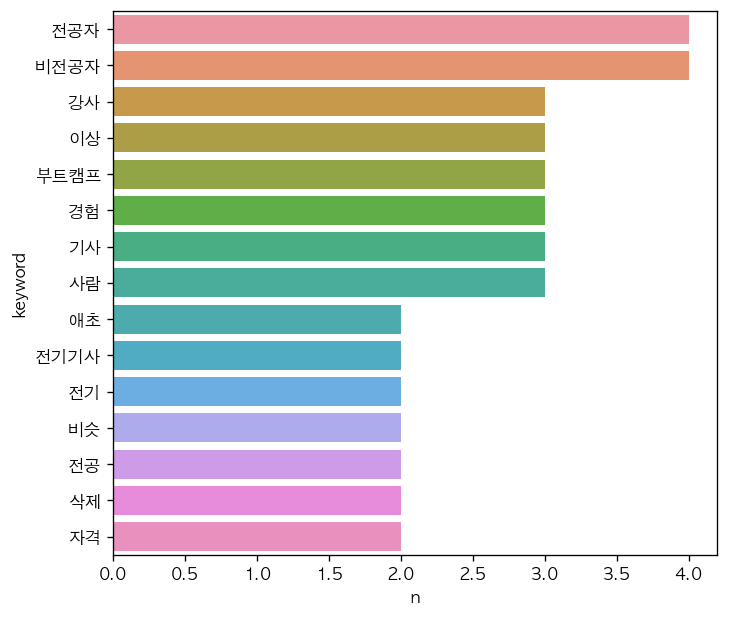

In [152]:
# 시각화하기(댓글내용)
plt.rcParams.update({'font.family' : 'AppleGothic', 'figure.dpi' : '120', 'figure.figsize' : [6.5, 6]})
sns.barplot(data = commit_top15, y = 'keyword', x = 'n');

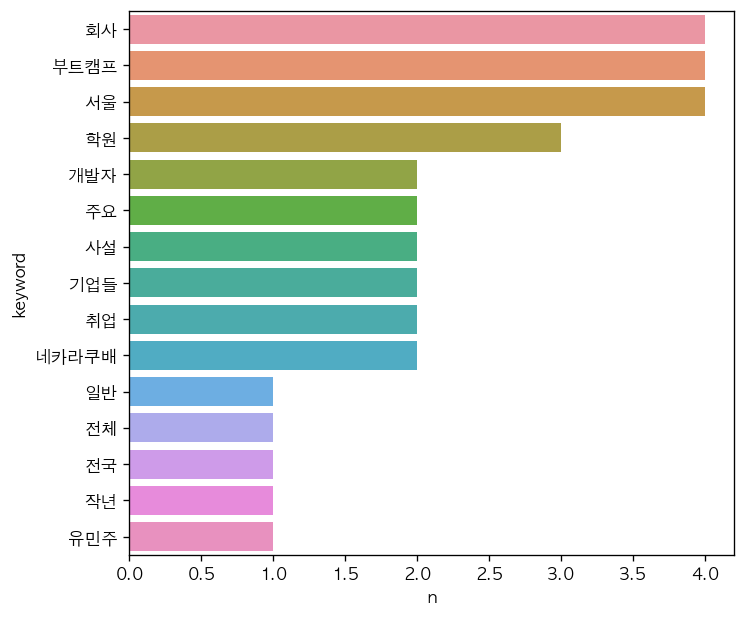

In [153]:
# 시각화하기(뉴스기사)
plt.rcParams.update({'font.family' : 'AppleGothic', 'figure.dpi' : '120', 'figure.figsize' : [6.5, 6]})
sns.barplot(data = news_top15, y = 'keyword', x = 'n');

In [154]:
# 워드클라우드로 시각화하기
# 폰트 지정
font = 'DoHyeon-Regular.ttf'

In [155]:
# 워드클라우드 시각화를 위해 딕셔너리 형태로 변환하기(댓글내용)
commit_dic = commit.set_index('keyword').to_dict()['n']
commit_dic

{'전공자': 4,
 '비전공자': 4,
 '강사': 3,
 '이상': 3,
 '부트캠프': 3,
 '경험': 3,
 '기사': 3,
 '사람': 3,
 '애초': 2,
 '전기기사': 2,
 '전기': 2,
 '비슷': 2,
 '전공': 2,
 '삭제': 2,
 '자격': 2,
 '시험': 2,
 '실무': 2,
 '응시가능': 2,
 '평생': 2,
 '우리나라': 2,
 '경우': 2,
 '학교': 2,
 '관련': 2,
 '하류': 1,
 '학습': 1,
 '학원': 1,
 '학원다니': 1,
 '전공학과': 1,
 '한국와서': 1,
 '한번': 1,
 '합격률': 1,
 '적자행진': 1,
 '저거': 1,
 '잘못봤': 1,
 '자기': 1,
 '있는건디': 1,
 '학벌': 1,
 '입장': 1,
 '했긴': 1,
 '입문자': 1,
 '현실': 1,
 '활용': 1,
 '이런데': 1,
 '응시조건': 1,
 '응시자격': 1,
 '회사': 1,
 '응시': 1,
 '운영': 1,
 '우리학': 1,
 '학생': 1,
 '전기전공': 1,
 '필드': 1,
 '전전': 1,
 '필기': 1,
 '학과많음': 1,
 '프로': 1,
 '판디님': 1,
 '파이썬정': 1,
 '토목': 1,
 '탑랭커들': 1,
 '쿠팡': 1,
 '코딩': 1,
 '코드스테이츠': 1,
 '케이스': 1,
 '컴공': 1,
 '커리큘럼': 1,
 '친구': 1,
 '취준생': 1,
 '취급': 1,
 '왜이리': 1,
 '출신': 1,
 '추천': 1,
 '최소한': 1,
 '초창기': 1,
 '창업자들': 1,
 '종사': 1,
 '종말': 1,
 '조건': 1,
 '충족': 1,
 '가능': 1,
 '예전': 1,
 '기능사도사니곸': 1,
 '독학': 1,
 '독특': 1,
 '도저': 1,
 '댓글입니다': 1,
 '댓글입니': 1,
 '대상': 1,
 '당연': 1,
 '다음회차': 1,
 '다들': 1,
 '누구': 1,
 '년제': 1,
 '낭비':

In [156]:
# 워드클라우드 시각화를 위해 딕셔너리 형태로 변환하기(뉴스기사)
news_dic = news.set_index('keyword').to_dict()['n']
news_dic

{'회사': 4,
 '부트캠프': 4,
 '서울': 4,
 '학원': 3,
 '개발자': 2,
 '주요': 2,
 '사설': 2,
 '기업들': 2,
 '취업': 2,
 '네카라쿠배': 2,
 '일반': 1,
 '전체': 1,
 '전국': 1,
 '작년': 1,
 '유민주': 1,
 '이날': 1,
 '위치한': 1,
 '위주': 1,
 '운영': 1,
 '올해': 1,
 '오전': 1,
 '실력': 1,
 '접수': 1,
 '지난달': 1,
 '종사자': 1,
 '시선': 1,
 '직군': 1,
 '초부': 1,
 '취준생': 1,
 '취직': 1,
 '카카오': 1,
 '컴퓨터': 1,
 '코드스테이츠': 1,
 '코딩': 1,
 '통계청': 1,
 '판교': 1,
 '프로그래밍': 1,
 '학력': 1,
 '학벌': 1,
 '시절': 1,
 '강남구': 1,
 '시대': 1,
 '길씨': 1,
 '대기업들': 1,
 '뉴스': 1,
 '눈물': 1,
 '네이버': 1,
 '끝났다': 1,
 '김동규': 1,
 '길모씨': 1,
 '시내': 1,
 '길거': 1,
 '기업군': 1,
 '구인난': 1,
 '교육': 1,
 '관련업': 1,
 '개발자들': 1,
 '대형': 1,
 '만원': 1,
 '문과생': 1,
 '부트': 1,
 '불구': 1,
 '비전공자': 1,
 '산업혁명': 1,
 '서대문구': 1,
 '서류': 1,
 '선망': 1,
 '성황': 1,
 '수강생': 1,
 '수강생들': 1,
 '수명': 1,
 '수업료': 1,
 '개발': 1,
 '스펙': 1,
 '스타트업': 1}

In [159]:
# 워드클라우드 구성하기(댓글내용)
from wordcloud import WordCloud
commit_wc = WordCloud(random_state = 1000,
                      font_path = font,
                      width = 400,
                      height = 400,
                      background_color = 'black')

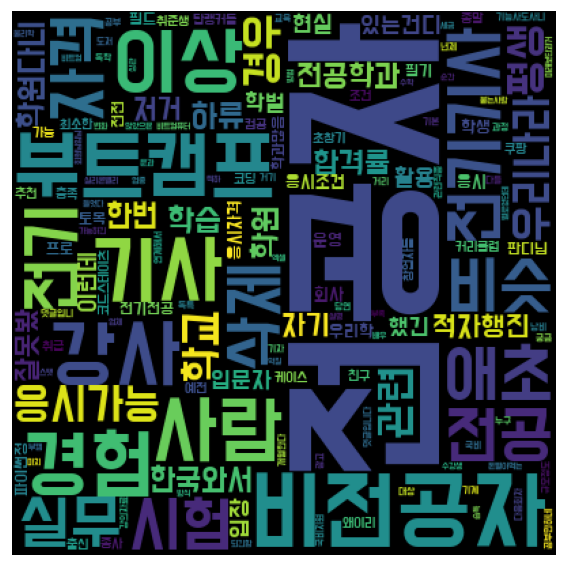

In [160]:
# 워드클라우드 만들기(댓글내용)
commit_wc_image = commit_wc.generate_from_frequencies(commit_dic)

plt.figure(figsize = (6,6))
plt.axis('off')
plt.imshow(commit_wc_image);

In [115]:
# 워드클라우드 구성하기(뉴스기사)
news_wc = WordCloud(random_state = 1,
                      font_path = font,
                      width = 400,
                      height = 400,
                      background_color = 'black')

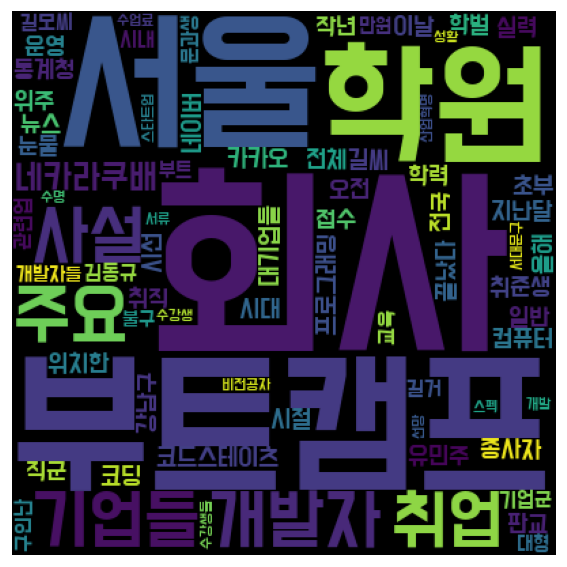

In [161]:
# 워드클라우드 만들기(뉴스기사)
news_wc_image = news_wc.generate_from_frequencies(news_dic)

plt.figure(figsize = (6,6))
plt.axis('off')
plt.imshow(news_wc_image);

In [117]:
# 두개의 데이터프레임 합치기
merge_df = pd.concat([commit,news])
merge_df

,keyword,n
98,전공자,4
54,비전공자,4
2,강사,3
88,이상,3
51,부트캠프,3
...,...,...
35,수명,1
36,수업료,1
1,개발,1
38,스펙,1


In [119]:
# 합친 데이터프레임을 딕셔너리 형태로 변환하기
merge_dic = merge_df.set_index('keyword').to_dict()['n']
merge_dic

{'전공자': 4,
 '비전공자': 1,
 '강사': 3,
 '이상': 3,
 '부트캠프': 4,
 '경험': 3,
 '기사': 3,
 '사람': 3,
 '애초': 2,
 '전기기사': 2,
 '전기': 2,
 '비슷': 2,
 '전공': 2,
 '삭제': 2,
 '자격': 2,
 '시험': 2,
 '실무': 2,
 '응시가능': 2,
 '평생': 2,
 '우리나라': 2,
 '경우': 2,
 '학교': 2,
 '관련': 2,
 '하류': 1,
 '학습': 1,
 '학원': 3,
 '학원다니': 1,
 '전공학과': 1,
 '한국와서': 1,
 '한번': 1,
 '합격률': 1,
 '적자행진': 1,
 '저거': 1,
 '잘못봤': 1,
 '자기': 1,
 '있는건디': 1,
 '학벌': 1,
 '입장': 1,
 '했긴': 1,
 '입문자': 1,
 '현실': 1,
 '활용': 1,
 '이런데': 1,
 '응시조건': 1,
 '응시자격': 1,
 '회사': 4,
 '응시': 1,
 '운영': 1,
 '우리학': 1,
 '학생': 1,
 '전기전공': 1,
 '필드': 1,
 '전전': 1,
 '필기': 1,
 '학과많음': 1,
 '프로': 1,
 '판디님': 1,
 '파이썬정': 1,
 '토목': 1,
 '탑랭커들': 1,
 '쿠팡': 1,
 '코딩': 1,
 '코드스테이츠': 1,
 '케이스': 1,
 '컴공': 1,
 '커리큘럼': 1,
 '친구': 1,
 '취준생': 1,
 '취급': 1,
 '왜이리': 1,
 '출신': 1,
 '추천': 1,
 '최소한': 1,
 '초창기': 1,
 '창업자들': 1,
 '종사': 1,
 '종말': 1,
 '조건': 1,
 '충족': 1,
 '가능': 1,
 '예전': 1,
 '기능사도사니곸': 1,
 '독학': 1,
 '독특': 1,
 '도저': 1,
 '댓글입니다': 1,
 '댓글입니': 1,
 '대상': 1,
 '당연': 1,
 '다음회차': 1,
 '다들': 1,
 '누구': 1,
 '년제': 1,
 '낭비':

In [120]:
merge_wc = WordCloud(random_state = 1000,
                     font_path = font,
                     width = 400,
                     height = 400,
                     background_color='black')

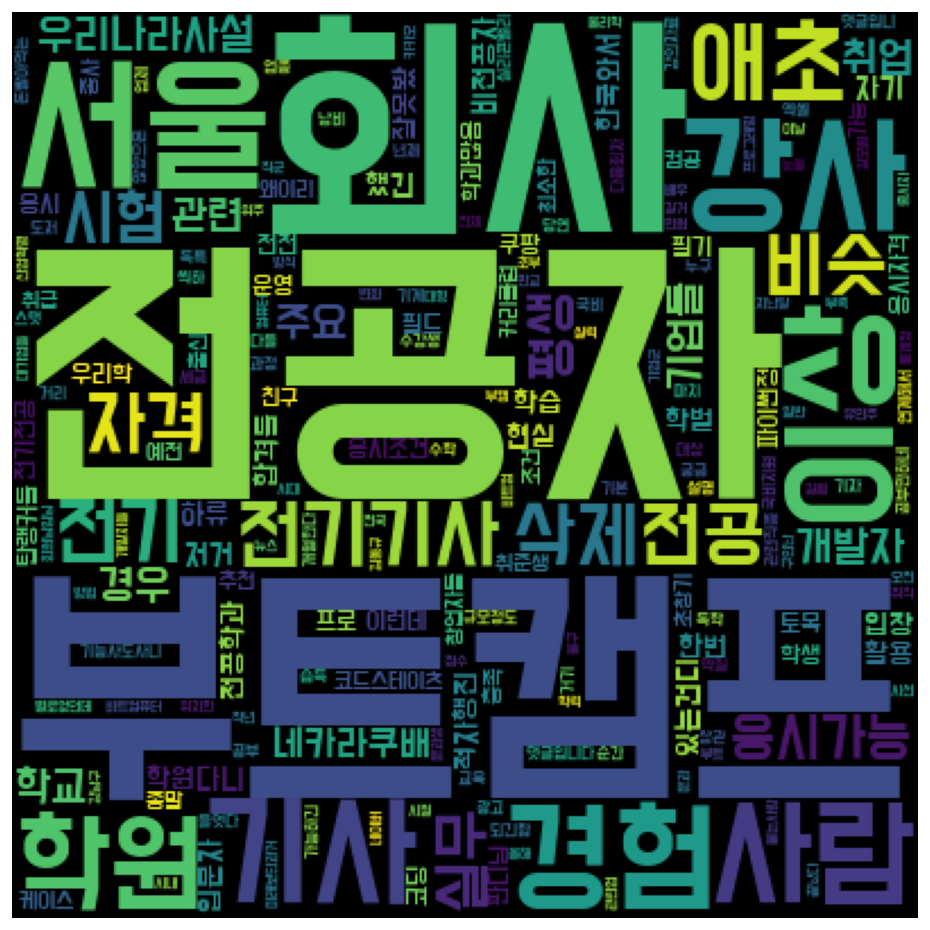

In [123]:
merge_wc_image = merge_wc.generate_from_frequencies(merge_dic)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(merge_wc_image);

In [124]:
merge_top15 = merge_df.head(15)
merge_top15

,keyword,n
98,전공자,4
54,비전공자,4
2,강사,3
88,이상,3
51,부트캠프,3
8,경험,3
23,기사,3
57,사람,3
73,애초,2
101,전기기사,2


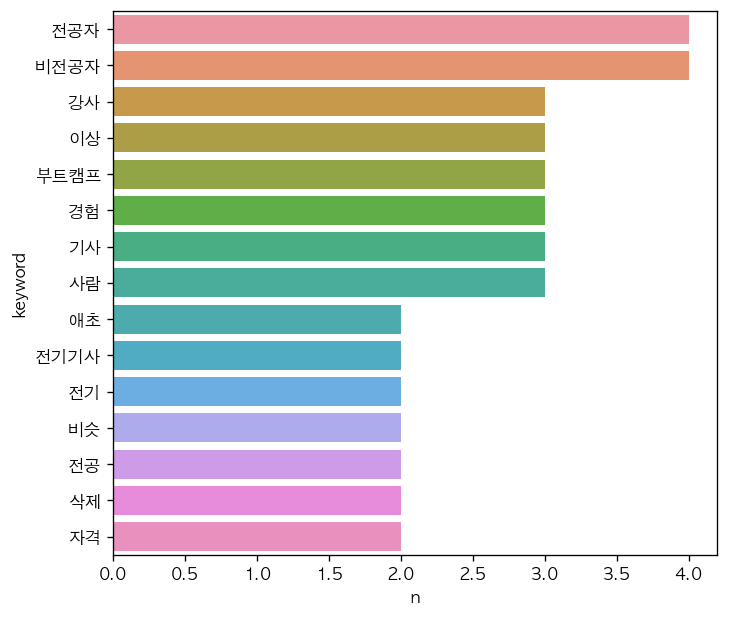

In [127]:
plt.rcParams.update({'font.family' : 'AppleGothic', 'figure.dpi' : '120', 'figure.figsize' : [6.5, 6]})
sns.barplot(data = merge_top15, y = 'keyword', x = 'n');